In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("morocco_literacy_regions_2024.csv")

# Sort by region alphabetically (for grouped chart)
df = df.sort_values("region")

regions = df["region"]
ill = df["illiteracy_rate_percent"]
lit = df["literacy_rate_percent"]
fem = df["female_literacy_percent"]

x = np.arange(len(regions))
width = 0.25


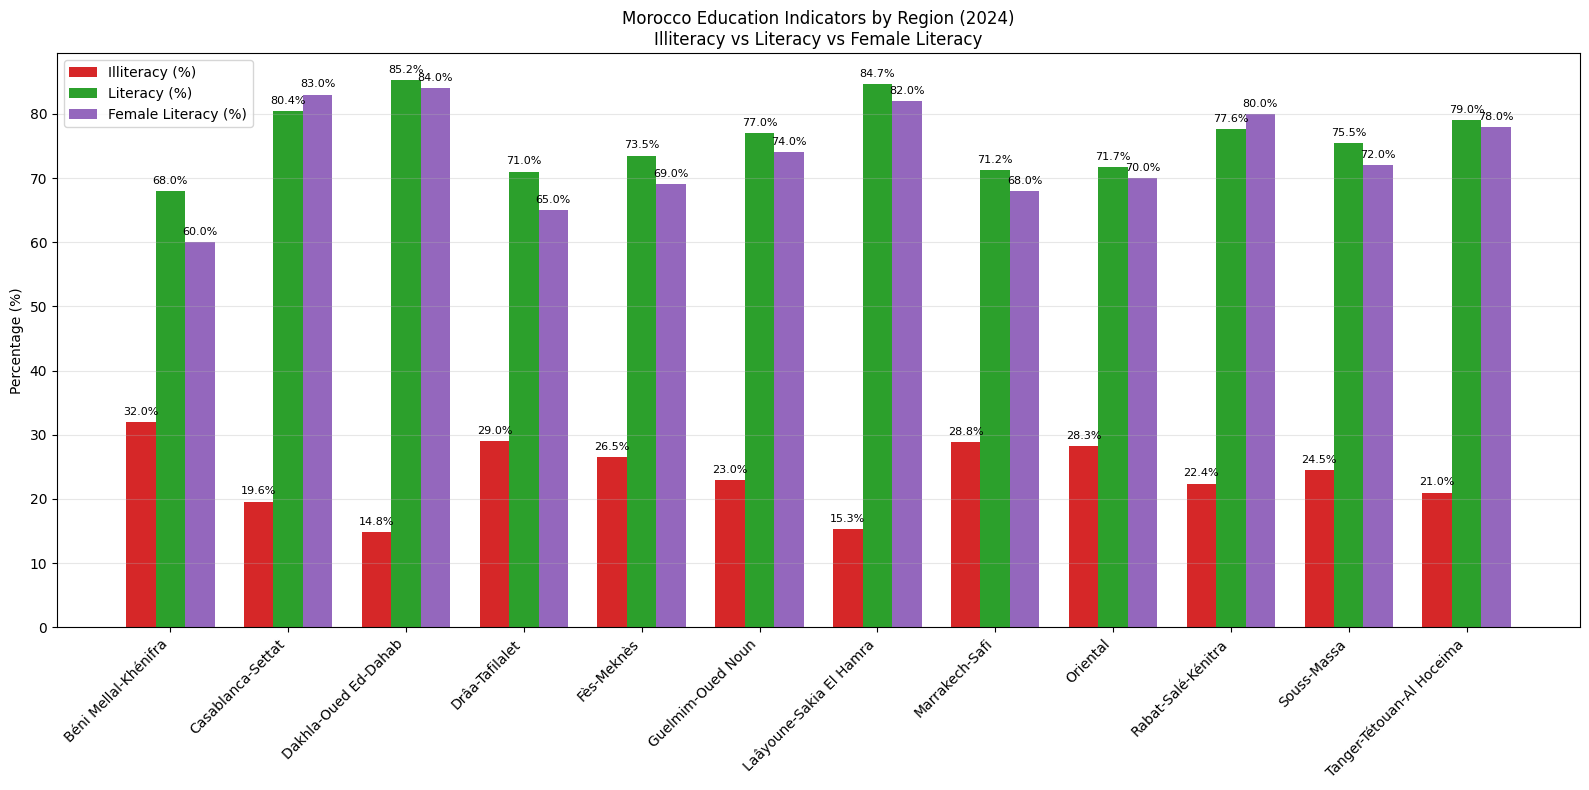

In [2]:
plt.figure(figsize=(16, 8))

# Bars
b1 = plt.bar(x - width, ill, width, label='Illiteracy (%)', color="#d62728")   # red
b2 = plt.bar(x, lit, width, label='Literacy (%)', color="#2ca02c")             # green
b3 = plt.bar(x + width, fem, width, label='Female Literacy (%)', color="#9467bd") # purple

# Add values above bars
for bars in [b1, b2, b3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.8,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Formatting
plt.xticks(x, regions, rotation=45, ha="right")
plt.title("Morocco Education Indicators by Region (2024)\nIlliteracy vs Literacy vs Female Literacy")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

plt.show()

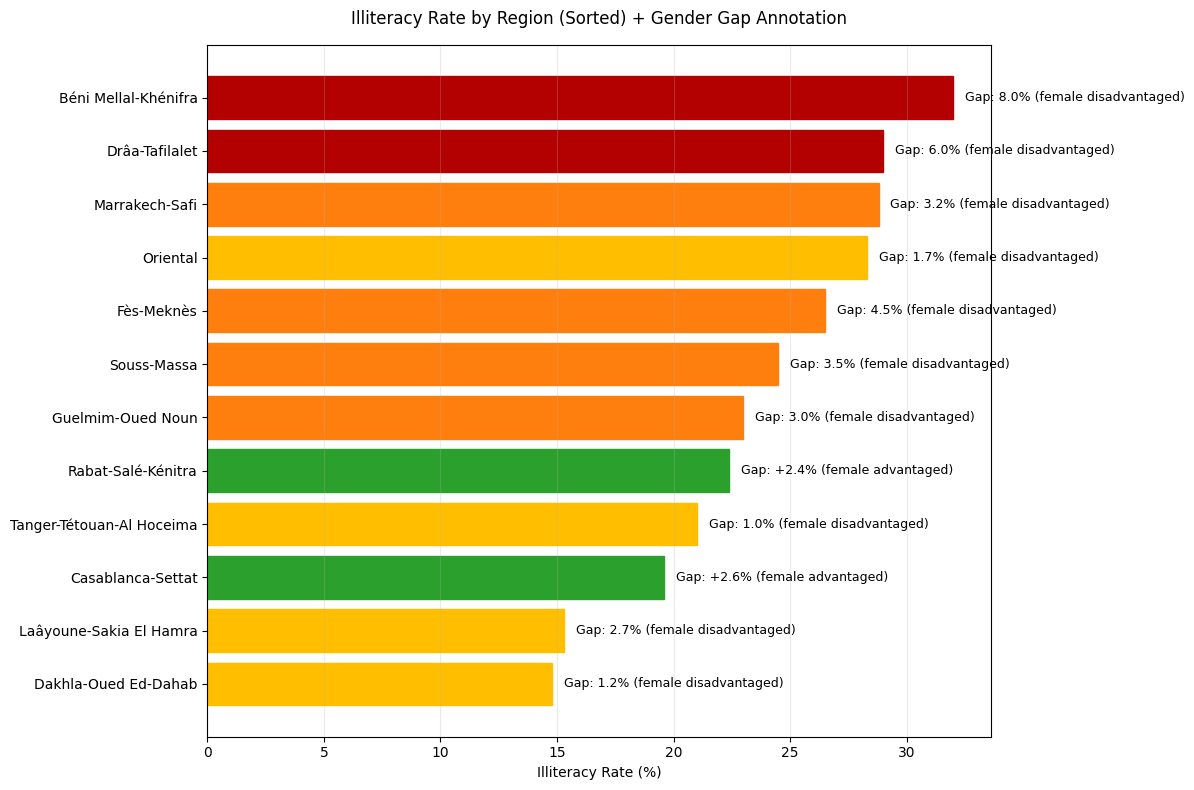

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("morocco_literacy_regions_2024.csv")

# Sort by illiteracy (descending = worst first)
df = df.sort_values("illiteracy_rate_percent", ascending=True)

regions = df["region"]
ill = df["illiteracy_rate_percent"]
gap = df["gender_gap"]

plt.figure(figsize=(12, 8))

bars = plt.barh(regions, ill, color="#d62728")  # base color red

# Highlight worst region (first in sorted ascending? Actually worst is last, reverse handling)
worst_idx = ill.idxmax()
best_idx = ill.idxmin()

# Color intensities depending on severity
for i, (bar, g) in enumerate(zip(bars, gap)):
    # Select color based on severity of gap
    if g >= 6:        # large inequality
        color = "#b30000"  # dark red
    elif g >= 3:      # medium inequality
        color = "#ff7f0e"  # orange
    elif g > 0:       # small inequality
        color = "#ffbf00"  # yellow
    else:             # female literacy higher than male
        color = "#2ca02c"  # green

    bar.set_color(color)

# Add annotations showing GAP as text on right side
for i, (val, g) in enumerate(zip(ill, gap)):
    if g > 0:
        text = f"Gap: {g:.1f}% (female disadvantaged)"
    else:
        text = f"Gap: +{-g:.1f}% (female advantaged)"
    plt.text(val + 0.5, i, text, va='center', fontsize=9)

# Titles and labels
plt.title("Illiteracy Rate by Region (Sorted) + Gender Gap Annotation", pad=15)
plt.xlabel("Illiteracy Rate (%)")
plt.grid(axis="x", alpha=0.25)

plt.tight_layout()
plt.show()
